<a href="https://colab.research.google.com/github/drfperez/lightkurve/blob/main/lightcurke1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install lightkurve astropy matplotlib numpy scipy ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.7 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=4e2df6fe973312c22c93a6eef326e8e09d3ca289da8e7b5e99d8c0d68097eb6c
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50451 sha256=13363bb6cff2e9e89581e567918d01fabb164472d0b8a

Text(value='', description='Exoplaneta:', placeholder="Introdueix el nom de l'exoplaneta")

Button(description='Obtenir corba de llum', style=ButtonStyle())

/usr/local/lib/python3.10/dist-packages/lightkurve/lightcurve.py:1131: LightkurveWarning: The light curve appears to be zero-centered (median=5.75e+05 electron / s +/- 1.17e+06 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


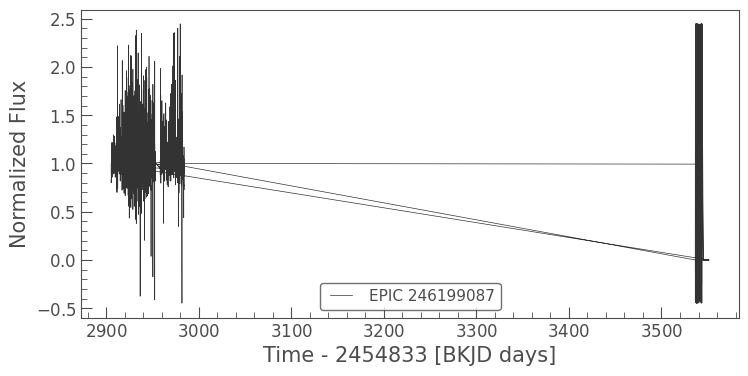

**Estadístiques bàsiques de la corba de llum:**

- Nombre de punts de dades: 129076

- Flux mitjà: 9.8719e-01

- Desviació estàndard del flux: 2.8091e-01

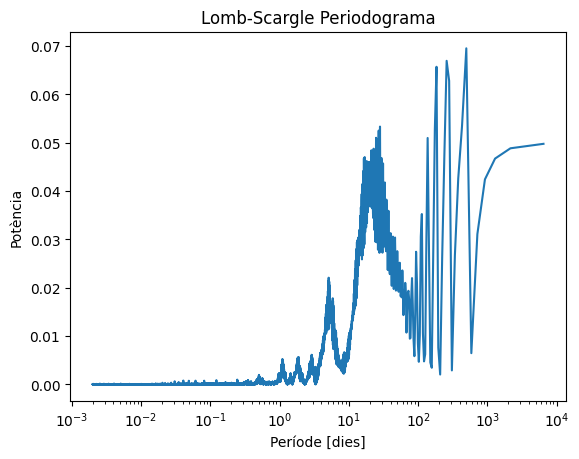

**Els períodes més prominents (dies) són:**

- Període: 184.5563 dies, Potència: 6.5727e-02

- Període: 258.3788 dies, Potència: 6.6963e-02

- Període: 280.8465 dies, Potència: 6.2817e-02

- Període: 430.6314 dies, Potència: 5.3413e-02

- Període: 496.8824 dies, Potència: 6.9549e-02

In [ ]:

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from IPython.display import display, Markdown
import ipywidgets as widgets

# Funció per descarregar i analitzar la corba de llum
def download_and_analyze_lightcurve(exoplanet_name):
    try:
        # Cerca i descarrega la corba de llum
        search_result = lk.search_lightcurve(exoplanet_name, mission='Kepler')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='K2')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='TESS')
        if len(search_result) == 0:
            display(Markdown("**No s'han trobat dades per a l'exoplaneta especificat.**"))
            return

        lc_collection = search_result.download_all()
        if lc_collection is None:
            display(Markdown("**No s'han pogut descarregar les dades per a l'exoplaneta especificat.**"))
            return

        lc = lc_collection.stitch()

        # Neteja i normalització de la corba de llum
        lc = lc.remove_nans().normalize().remove_outliers(sigma=5)

        # Representació de la corba de llum
        lc.plot()
        plt.show()

        # Estadístiques bàsiques
        mean_flux = np.mean(lc.flux)
        std_flux = np.std(lc.flux)
        num_data_points = len(lc.flux)

        display(Markdown(f"**Estadístiques bàsiques de la corba de llum:**"))
        display(Markdown(f"- Nombre de punts de dades: {num_data_points}"))
        display(Markdown(f"- Flux mitjà: {mean_flux:.4e}"))
        display(Markdown(f"- Desviació estàndard del flux: {std_flux:.4e}"))

        # Transformada de Lomb-Scargle per detectar períodes
        frequency, power = LombScargle(lc.time.value, lc.flux.value).autopower()
        period = 1 / frequency
        plt.plot(period, power)
        plt.xscale('log')
        plt.xlabel('Període [dies]')
        plt.ylabel('Potència')
        plt.title('Lomb-Scargle Periodograma')
        plt.show()

        # Identificació dels períodes més prominents
        peak_indices = np.argsort(power)[-5:]  # Els 5 períodes amb més potència
        peak_periods = period[peak_indices]
        peak_powers = power[peak_indices]

        sorted_peaks = sorted(zip(peak_periods, peak_powers), key=lambda x: x[0])

        display(Markdown(f"**Els períodes més prominents (dies) són:**"))
        for p, pow in sorted_peaks:
            display(Markdown(f"- Període: {p:.4f} dies, Potència: {pow:.4e}"))

    except Exception as e:
        display(Markdown(f"**Ha ocorregut un error: {e}**"))

# Interfície gràfica per introduir el nom de l'exoplaneta
exoplanet_name_textbox = widgets.Text(
    value='',
    placeholder='Introdueix el nom de l\'exoplaneta',
    description='Exoplaneta:',
    disabled=False
)

def on_button_clicked(b):
    exoplanet_name = exoplanet_name_textbox.value
    download_and_analyze_lightcurve(exoplanet_name)

button = widgets.Button(description="Obtenir corba de llum")
button.on_click(on_button_clicked)

display(exoplanet_name_textbox, button)

In [ ]:
!pip install astroquery


El períodegrama de Lomb-Scargle és una tècnica estadística utilitzada per analitzar les sèries temporals i detectar patrons periòdics en dades que no estan uniformement mostrejades en el temps. Aquest mètode és especialment útil quan les dades són escasses o no estan uniformement distribuïdes en el temps.

El períodegrama de Lomb-Scargle és una variant del períodegrama de Fourier, que és una tècnica més comuna per analitzar les sèries temporals. No obstant això, el períodegrama de Fourier requereix que les dades estiguin uniformement mostrejades en el temps, cosa que no sempre és el cas en la pràctica.

El períodegrama de Lomb-Scargle és una tècnica no paramètrica que s'utilitza per detectar patrons periòdics en les dades. Aquest mètode es basa en la transformada de Fourier, però utilitza una aproximació diferent per tractar les dades no uniformement mostrejades.

El períodegrama de Lomb-Scargle té diverses aplicacions en diferents camps, com ara:

Astronomia: per analitzar les variacions en la brillantor d'estels o altres objectes astronòmics.
Física: per analitzar les oscil·lacions en sistemes físics, com ara les ones gravitacionals.
Biologia: per analitzar les oscil·lacions en els patrons de comportament d'organismes vius.
Economia: per analitzar les oscil·lacions en les sèries temporals econòmiques, com ara les taxes d'interès o les cotitzacions borsàries.
El períodegrama de Lomb-Scargle té diverses avantatges, com ara:

Flexibilitat: el períodegrama de Lomb-Scargle pot tractar dades no uniformement mostrejades en el temps.
Robustesa: el períodegrama de Lomb-Scargle és menys susceptible a les influències de les dades errònies o anòmales.
Interpretació fàcil: el períodegrama de Lomb-Scargle proporciona una representació gràfica clara dels patrons periòdics en les dades.
No obstant això, el períodegrama de Lomb-Scargle també té alguns desavantatges, com ara:

Computacionalment intensiu: el períodegrama de Lomb-Scargle pot ser computacionalment intensiu, especialment per a grans conjunts de dades.
Requereix una gran quantitat de dades: el períodegrama de Lomb-Scargle requereix una gran quantitat de dades per obtenir resultats fiables.

In [ ]:

# Importa les biblioteques necessàries
!pip install astroquery

from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive

# Funció per obtenir els noms dels atributs d'un exoplaneta
def get_exoplanet_attributes(exoplanet_name):
    # Utilitza la taula correcta i el nom de columna correcte per buscar els exoplanetes
    exoplanet_data = NasaExoplanetArchive.query_criteria(table="pscomppars", select="*", where=f"pl_name like '%{exoplanet_name}%'")

    if len(exoplanet_data) == 0:
        return f"No s'han trobat dades per a l'exoplaneta: {exoplanet_name}"

    # Obté els noms dels atributs
    attributes = exoplanet_data.colnames

    return attributes

# Demana a l'usuari el nom d'un exoplaneta
exoplanet_name = input("Introdueix el nom de l'exoplaneta: ")

# Obté els noms dels atributs de l'exoplaneta
attributes = get_exoplanet_attributes(exoplanet_name)

# Mostra els noms dels atributs
if isinstance(attributes, str):
    print(attributes)
else:
    for attr in attributes:
        print(attr)

Introdueix el nom de l'exoplaneta: Kepler-10
pl_name
pl_letter
hostname
hd_name
hip_name
tic_id
disc_pubdate
disc_year
discoverymethod
disc_locale
disc_facility
disc_instrument
disc_telescope
disc_refname
ra
rastr
dec
decstr
glon
glat
elon
elat
ra_reflink
pl_orbper
pl_orbpererr1
pl_orbpererr2
pl_orbperlim
pl_orbperstr
pl_orbper_reflink
pl_orblpererr1
pl_orblper
pl_orblpererr2
pl_orblperlim
pl_orblperstr
pl_orblper_reflink
pl_orbsmax
pl_orbsmaxerr1
pl_orbsmaxerr2
pl_orbsmaxlim
pl_orbsmaxstr
pl_orbsmax_reflink
pl_angsep
pl_angseperr1
pl_angseperr2
pl_angseplim
pl_angsepstr
pl_angsep_reflink
pl_orbincl
pl_orbinclerr1
pl_orbinclerr2
pl_orbincllim
pl_orbinclstr
pl_orbincl_reflink
pl_orbtper
pl_orbtpererr1
pl_orbtpererr2
pl_orbtperlim
pl_orbtperstr
pl_orbtper_reflink
pl_orbeccen
pl_orbeccenerr1
pl_orbeccenerr2
pl_orbeccenlim
pl_orbeccenstr
pl_orbeccen_reflink
pl_eqt
pl_eqterr1
pl_eqterr2
pl_eqtlim
pl_eqtstr
pl_eqt_reflink
pl_occdep
pl_occdeperr1
pl_occdeperr2
pl_occdeplim
pl_occdepstr
pl_occ

In [ ]:

# Install necessary packages
!pip install astroquery ipywidgets

# Import libraries
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive
import ipywidgets as widgets
from IPython.display import display

# Define a function to get exoplanet data
def get_exoplanet_data(name):
    try:
        # Query the NASA Exoplanet Archive for the given exoplanet name
        exoplanet_data = NasaExoplanetArchive.query_criteria(table="pscomppars", select="*", where=f"pl_name like '%{name}%'")

        # Check if data is available
        if len(exoplanet_data) == 0:
            return f"No data found for exoplanet: {name}"

        # Extract and format the important data
        data = exoplanet_data[0]
        info = f"""
        Exoplanet Name: {data['pl_name']}
        Discovery Method: {data['discoverymethod']}
        Orbital Period (days): {data['pl_orbper']}
        Planet Radius (Jupiter radii): {data['pl_radj']}
        Planet Mass (Jupiter mass): {data['pl_bmassj']}
        Host Star Name: {data['hostname']}
        Host Star Effective Temperature (K): {data['st_teff']}
        Host Star Radius (solar radii): {data['st_rad']}
        Host Star Mass (solar mass): {data['st_mass']}
        """
        return info
    except Exception as e:
        return str(e)

# Create an input textbox widget for exoplanet name
name_textbox = widgets.Text(
    description="Exoplanet Name:",
    placeholder="Enter the name of an exoplanet",
)

# Create an output area widget to display the exoplanet data
output_area = widgets.Output()

# Define a function to handle textbox input
def on_text_submit(change):
    with output_area:
        output_area.clear_output()
        exoplanet_name = change['new']
        info = get_exoplanet_data(exoplanet_name)
        print(info)

# Attach the handler to the textbox widget
name_textbox.observe(on_text_submit, names='value')

# Display the widgets
display(name_textbox, output_area)

Text(value='', description='Exoplanet Name:', placeholder='Enter the name of an exoplanet')

Output()

Període: 10.0


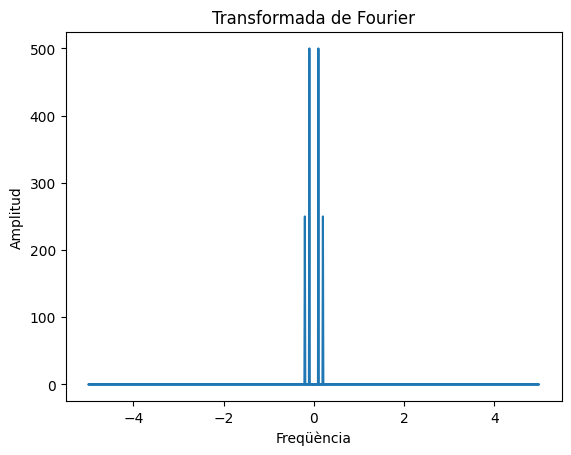

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Generem una sèrie temporal amb un període de 10 unitats
t = np.arange(0, 100, 0.1)
x = np.sin(2 * np.pi * t / 10) + 0.5 * np.sin(4 * np.pi * t / 10)

# Apliquem la transformada de Fourier
X = np.fft.fft(x)

# Calculem les freqüències
freq = np.fft.fftfreq(len(x), d=0.1)

# Trobem el període
period = 1 / freq[np.argmax(np.abs(X))]

print("Període:", period)

# Grafiquem la transformada de Fourier
plt.plot(freq, np.abs(X))
plt.xlabel("Freqüència")
plt.ylabel("Amplitud")
plt.title("Transformada de Fourier")
plt.show()

Període trobat: 10.00 dies


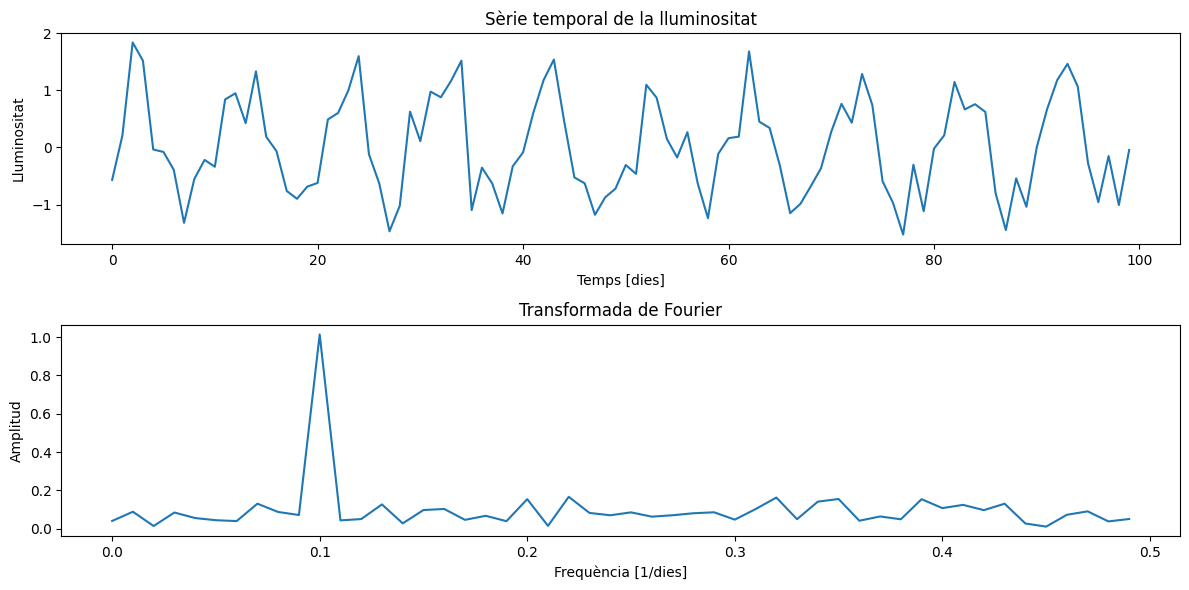

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Generar dades sintètiques
N = 100  # nombre de punts de dades
T = 1.0  # interval de temps entre mesures (1 dia)
x = np.linspace(0.0, N*T, N, endpoint=False)
# La lluminositat varia amb un període de 10 dies
y = np.sin(2.0 * np.pi * x / 10) + 0.5 * np.random.normal(size=N)

# Aplicar la transformada de Fourier
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

# Calcular el període corresponent a la freqüència dominant
dominant_freq = xf[np.argmax(np.abs(yf[:N//2]))]
period = 1 / dominant_freq

# Mostrar els resultats
print(f"Període trobat: {period:.2f} dies")

# Visualitzar les dades i l'espectre de Fourier
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title('Sèrie temporal de la lluminositat')
plt.xlabel('Temps [dies]')
plt.ylabel('Lluminositat')

plt.subplot(2, 1, 2)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title('Transformada de Fourier')
plt.xlabel('Frequència [1/dies]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

Text(value='', description='Exoplaneta:', placeholder="Introdueix el nom de l'exoplaneta")

Button(description='Obtenir corba de llum', style=ButtonStyle())

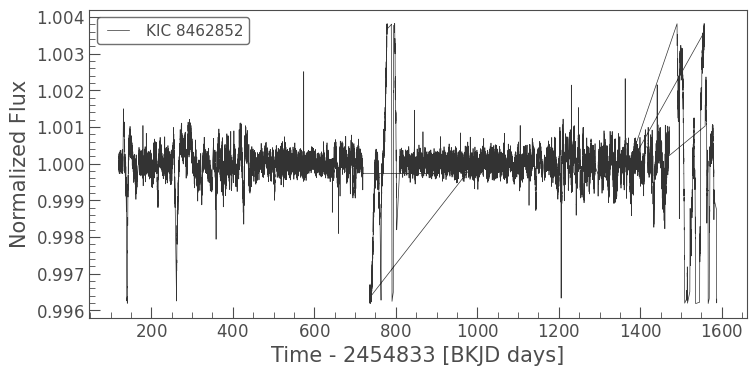

**Estadístiques bàsiques de la corba de llum:**

- Nombre de punts de dades: 62658

- Flux mitjà: 1.0000e+00

- Desviació estàndard del flux: 6.6877e-04

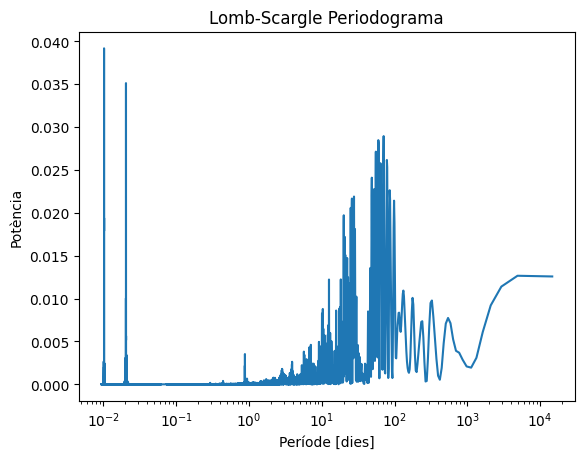

**Els períodes més prominents (dies) són:**

- Període: 0.0102 dies, Potència: 2.5479e-02

- Període: 0.0102 dies, Potència: 2.7765e-02

- Període: 0.0102 dies, Potència: 2.2821e-02

- Període: 0.0102 dies, Potència: 2.8094e-02

- Període: 0.0102 dies, Potència: 3.5449e-02

- Període: 0.0102 dies, Potència: 2.9035e-02

- Període: 0.0102 dies, Potència: 2.2456e-02

- Període: 0.0102 dies, Potència: 2.7132e-02

- Període: 0.0102 dies, Potència: 2.3597e-02

- Període: 0.0102 dies, Potència: 2.4732e-02

- Període: 0.0102 dies, Potència: 2.8740e-02

- Període: 0.0102 dies, Potència: 2.5969e-02

- Període: 0.0102 dies, Potència: 2.8252e-02

- Període: 0.0102 dies, Potència: 2.8015e-02

- Període: 0.0102 dies, Potència: 2.9173e-02

- Període: 0.0102 dies, Potència: 3.9177e-02

- Període: 0.0102 dies, Potència: 3.8391e-02

- Període: 0.0102 dies, Potència: 2.6908e-02

- Període: 0.0102 dies, Potència: 2.6530e-02

- Període: 0.0102 dies, Potència: 3.7915e-02

- Període: 0.0102 dies, Potència: 3.9136e-02

- Període: 0.0102 dies, Potència: 2.9581e-02

- Període: 0.0102 dies, Potència: 2.3495e-02

- Període: 0.0102 dies, Potència: 2.7864e-02

- Període: 0.0102 dies, Potència: 2.3905e-02

- Període: 0.0102 dies, Potència: 2.2583e-02

- Període: 0.0102 dies, Potència: 2.4602e-02

- Període: 0.0102 dies, Potència: 2.2325e-02

- Període: 0.0102 dies, Potència: 2.7920e-02

- Període: 0.0102 dies, Potència: 2.6030e-02

- Període: 0.0102 dies, Potència: 3.1048e-02

- Període: 0.0102 dies, Potència: 3.6775e-02

- Període: 0.0102 dies, Potència: 3.1294e-02

- Període: 0.0102 dies, Potència: 3.0066e-02

- Període: 0.0102 dies, Potència: 3.5962e-02

- Període: 0.0102 dies, Potència: 3.0438e-02

- Període: 0.0102 dies, Potència: 2.1683e-02

- Període: 0.0102 dies, Potència: 2.8678e-02

- Període: 0.0102 dies, Potència: 2.6830e-02

- Període: 0.0204 dies, Potència: 2.4362e-02

- Període: 0.0204 dies, Potència: 2.2778e-02

- Període: 0.0204 dies, Potència: 2.2455e-02

- Període: 0.0204 dies, Potència: 2.3429e-02

- Període: 0.0204 dies, Potència: 3.2571e-02

- Període: 0.0204 dies, Potència: 3.0100e-02

- Període: 0.0204 dies, Potència: 2.1737e-02

- Període: 0.0204 dies, Potència: 2.5321e-02

- Període: 0.0204 dies, Potència: 2.7212e-02

- Període: 0.0204 dies, Potència: 3.1311e-02

- Període: 0.0204 dies, Potència: 2.4606e-02

- Període: 0.0204 dies, Potència: 2.3370e-02

- Període: 0.0204 dies, Potència: 2.9604e-02

- Període: 0.0204 dies, Potència: 3.1819e-02

- Període: 0.0204 dies, Potència: 2.5608e-02

- Període: 0.0204 dies, Potència: 2.2978e-02

- Període: 0.0204 dies, Potència: 2.3428e-02

- Període: 0.0204 dies, Potència: 3.0231e-02

- Període: 0.0204 dies, Potència: 3.5117e-02

- Període: 0.0204 dies, Potència: 2.9829e-02

- Període: 0.0204 dies, Potència: 2.5694e-02

- Període: 0.0204 dies, Potència: 2.5394e-02

- Període: 0.0204 dies, Potència: 2.8452e-02

- Període: 0.0204 dies, Potència: 3.0990e-02

- Període: 0.0204 dies, Potència: 2.4834e-02

- Període: 0.0204 dies, Potència: 2.3551e-02

- Període: 0.0204 dies, Potència: 3.0555e-02

- Període: 0.0204 dies, Potència: 3.1588e-02

- Període: 0.0204 dies, Potència: 2.3578e-02

- Període: 0.0204 dies, Potència: 2.1631e-02

- Període: 0.0204 dies, Potència: 2.4802e-02

- Període: 0.0204 dies, Potència: 2.2548e-02

- Període: 0.0204 dies, Potència: 3.2380e-02

- Període: 0.0204 dies, Potència: 3.3206e-02

- Període: 0.0204 dies, Potència: 2.3925e-02

- Període: 0.0204 dies, Potència: 2.2136e-02

- Període: 0.0204 dies, Potència: 2.4703e-02

- Període: 0.0204 dies, Potència: 2.7392e-02

- Període: 0.0204 dies, Potència: 2.1754e-02

- Període: 0.0205 dies, Potència: 2.3325e-02

- Període: 25.9655 dies, Potència: 2.1659e-02

- Període: 27.7325 dies, Potència: 2.1894e-02

- Període: 48.4175 dies, Potència: 2.2103e-02

- Període: 48.7392 dies, Potència: 2.4094e-02

- Període: 52.5824 dies, Potència: 2.2771e-02

- Període: 54.9457 dies, Potència: 2.4070e-02

- Període: 55.3604 dies, Potència: 2.7127e-02

- Període: 55.7814 dies, Potència: 2.2780e-02

- Període: 59.8796 dies, Potència: 2.8471e-02

- Període: 60.3724 dies, Potència: 2.8187e-02

- Període: 63.5086 dies, Potència: 2.3111e-02

- Període: 64.0633 dies, Potència: 2.5777e-02

- Període: 64.6277 dies, Potència: 2.4748e-02

- Període: 65.2022 dies, Potència: 2.3184e-02

- Període: 65.7870 dies, Potència: 2.2110e-02

- Període: 70.1938 dies, Potència: 2.6588e-02

- Període: 70.8720 dies, Potència: 2.8940e-02

- Període: 71.5634 dies, Potència: 2.3075e-02

- Període: 78.4519 dies, Potència: 2.6159e-02

- Període: 79.3000 dies, Potència: 2.5325e-02

- Període: 85.7924 dies, Potència: 2.2632e-02

In [ ]:

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from IPython.display import display, Markdown
import ipywidgets as widgets

# Funció per descarregar i analitzar la corba de llum
def download_and_analyze_lightcurve(exoplanet_name):
    try:
        # Cerca i descarrega la corba de llum
        search_result = lk.search_lightcurve(exoplanet_name, mission='Kepler')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='K2')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='TESS')
        if len(search_result) == 0:
            display(Markdown("**No s'han trobat dades per a l'exoplaneta especificat.**"))
            return

        lc_collection = search_result.download_all()
        if lc_collection is None:
            display(Markdown("**No s'han pogut descarregar les dades per a l'exoplaneta especificat.**"))
            return

        lc = lc_collection.stitch()

        # Neteja i normalització de la corba de llum
        lc = lc.remove_nans().normalize().remove_outliers(sigma=5)

        # Representació de la corba de llum
        lc.plot()
        plt.show()

        # Estadístiques bàsiques
        mean_flux = np.mean(lc.flux)
        std_flux = np.std(lc.flux)
        num_data_points = len(lc.flux)

        display(Markdown(f"**Estadístiques bàsiques de la corba de llum:**"))
        display(Markdown(f"- Nombre de punts de dades: {num_data_points}"))
        display(Markdown(f"- Flux mitjà: {mean_flux:.4e}"))
        display(Markdown(f"- Desviació estàndard del flux: {std_flux:.4e}"))

        # Transformada de Lomb-Scargle per detectar períodes
        frequency, power = LombScargle(lc.time.value, lc.flux.value).autopower()
        period = 1 / frequency
        plt.plot(period, power)
        plt.xscale('log')
        plt.xlabel('Període [dies]')
        plt.ylabel('Potència')
        plt.title('Lomb-Scargle Periodograma')
        plt.show()

        # Identificació dels períodes més prominents
        peak_indices = np.argsort(power)[-100:]  # Els 5 períodes amb més potència
        peak_periods = period[peak_indices]
        peak_powers = power[peak_indices]

        sorted_peaks = sorted(zip(peak_periods, peak_powers), key=lambda x: x[0])

        display(Markdown(f"**Els períodes més prominents (dies) són:**"))
        for p, pow in sorted_peaks:
            display(Markdown(f"- Període: {p:.4f} dies, Potència: {pow:.4e}"))

    except Exception as e:
        display(Markdown(f"**Ha ocorregut un error: {e}**"))

# Interfície gràfica per introduir el nom de l'exoplaneta
exoplanet_name_textbox = widgets.Text(
    value='',
    placeholder='Introdueix el nom de l\'exoplaneta',
    description='Exoplaneta:',
    disabled=False
)

def on_button_clicked(b):
    exoplanet_name = exoplanet_name_textbox.value
    download_and_analyze_lightcurve(exoplanet_name)

button = widgets.Button(description="Obtenir corba de llum")
button.on_click(on_button_clicked)

display(exoplanet_name_textbox, button)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 14.0 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=9a43a1bfacfb375de4c741a07944ea97e5c8dbcfaccb32bd3be24174c5fd1218
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50451 sha256=44a2de1a8f1ef319530de9eb49d7469543f07b42857716751d42722453a44590
  Stored in directory: /root/.cache/pip/wheels/3e/b8/c5/b553

Text(value='', description='Estrella:', placeholder="Introdueix el nom de l'estrella")

Button(description='Obtenir corba de llum', style=ButtonStyle())

Could not resolve Trappist 1 to a sky position.
ERROR:lightkurve.search:Could not resolve Trappist 1 to a sky position.
Could not resolve Trappist 1 to a sky position.
ERROR:lightkurve.search:Could not resolve Trappist 1 to a sky position.
Could not resolve Trappist 1 to a sky position.
ERROR:lightkurve.search:Could not resolve Trappist 1 to a sky position.


**No s'han trobat dades per a l'exoplaneta especificat.**

No data found for target "Trappist 1b".
ERROR:lightkurve.search:No data found for target "Trappist 1b".
/usr/local/lib/python3.10/dist-packages/lightkurve/lightcurve.py:1131: LightkurveWarning: The light curve appears to be zero-centered (median=5.75e+05 electron / s +/- 1.17e+06 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


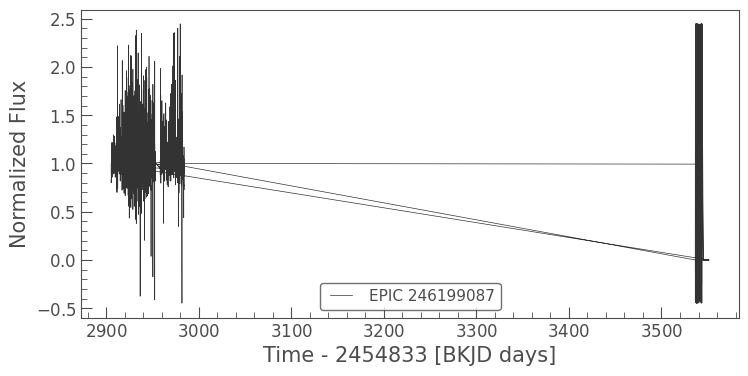

**Estadístiques bàsiques de la corba de llum:**

- Nombre de punts de dades: 129076

- Flux mitjà: 9.8719e-01

- Desviació estàndard del flux: 2.8091e-01

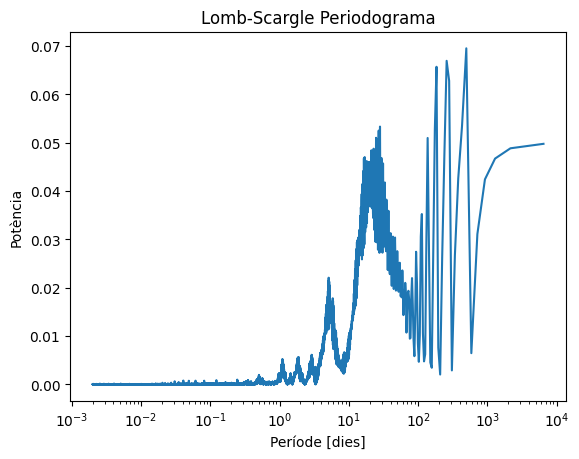

**Els períodes més prominents (dies) són:**

- Període: 14.5812 dies, Potència: 3.4859e-02

- Període: 14.9179 dies, Potència: 3.6612e-02

- Període: 14.9872 dies, Potència: 3.6179e-02

- Període: 15.2706 dies, Potència: 3.8104e-02

- Període: 15.3432 dies, Potència: 3.9388e-02

- Període: 15.6404 dies, Potència: 4.0291e-02

- Període: 15.7165 dies, Potència: 4.1461e-02

- Període: 15.7933 dies, Potència: 3.4938e-02

- Període: 16.0285 dies, Potència: 4.1212e-02

- Període: 16.1084 dies, Potència: 4.4130e-02

- Període: 16.1891 dies, Potència: 3.8039e-02

- Període: 16.4363 dies, Potència: 3.9013e-02

- Període: 16.5204 dies, Potència: 4.6778e-02

- Període: 16.6053 dies, Potència: 4.0862e-02

- Període: 16.8655 dies, Potència: 3.5408e-02

- Període: 16.9540 dies, Potència: 4.7038e-02

- Període: 17.0435 dies, Potència: 4.3830e-02

- Període: 17.1339 dies, Potència: 3.6712e-02

- Període: 17.4110 dies, Potència: 4.4943e-02

- Període: 17.5053 dies, Potència: 4.5674e-02

- Període: 17.6007 dies, Potència: 3.9283e-02

- Període: 17.8933 dies, Potència: 4.2245e-02

- Període: 17.9930 dies, Potència: 4.6189e-02

- Període: 18.0938 dies, Potència: 4.0875e-02

- Període: 18.1957 dies, Potència: 3.7304e-02

- Període: 18.4031 dies, Potència: 3.9400e-02

- Període: 18.5085 dies, Potència: 4.6089e-02

- Període: 18.6152 dies, Potència: 4.2016e-02

- Període: 18.7231 dies, Potència: 3.8652e-02

- Període: 18.8323 dies, Potència: 3.5635e-02

- Període: 18.9427 dies, Potència: 3.6996e-02

- Període: 19.0545 dies, Potència: 4.4426e-02

- Període: 19.1676 dies, Potència: 4.4170e-02

- Període: 19.2820 dies, Potència: 3.8849e-02

- Període: 19.3978 dies, Potència: 3.7338e-02

- Període: 19.5150 dies, Potència: 3.6867e-02

- Període: 19.6336 dies, Potència: 4.0659e-02

- Període: 19.7537 dies, Potència: 4.6034e-02

- Període: 19.8753 dies, Potència: 4.0890e-02

- Període: 19.9984 dies, Potència: 3.6880e-02

- Període: 20.1230 dies, Potència: 3.8466e-02

- Període: 20.2491 dies, Potència: 3.7494e-02

- Període: 20.3769 dies, Potència: 4.4512e-02

- Període: 20.5063 dies, Potència: 4.5481e-02

- Període: 20.6373 dies, Potència: 3.6791e-02

- Període: 20.7700 dies, Potència: 3.8456e-02

- Període: 20.9044 dies, Potència: 3.7123e-02

- Període: 21.0406 dies, Potència: 4.0069e-02

- Període: 21.1786 dies, Potència: 4.8441e-02

- Període: 21.3184 dies, Potència: 4.0565e-02

- Període: 21.4600 dies, Potència: 3.6706e-02

- Període: 21.6036 dies, Potència: 3.7184e-02

- Període: 21.7491 dies, Potència: 3.6420e-02

- Període: 21.8965 dies, Potència: 4.6577e-02

- Període: 22.0460 dies, Potència: 4.6216e-02

- Període: 22.1975 dies, Potència: 3.7631e-02

- Període: 22.3511 dies, Potència: 3.5346e-02

- Període: 22.6648 dies, Potència: 4.2044e-02

- Període: 22.8250 dies, Potència: 4.8771e-02

- Període: 22.9874 dies, Potència: 4.2814e-02

- Període: 23.4890 dies, Potència: 3.7786e-02

- Període: 23.6611 dies, Potència: 4.7060e-02

- Període: 23.8357 dies, Potència: 4.8372e-02

- Període: 24.0129 dies, Potència: 3.7361e-02

- Període: 24.5607 dies, Potència: 4.3043e-02

- Període: 24.7489 dies, Potència: 5.1031e-02

- Període: 24.9400 dies, Potència: 4.2876e-02

- Període: 25.5315 dies, Potència: 3.7365e-02

- Període: 25.7349 dies, Potència: 5.0609e-02

- Període: 25.9416 dies, Potència: 4.8186e-02

- Període: 26.8028 dies, Potència: 4.6391e-02

- Període: 27.0271 dies, Potència: 5.2527e-02

- Període: 27.2552 dies, Potència: 3.6610e-02

- Període: 27.9631 dies, Potència: 3.7978e-02

- Període: 28.2073 dies, Potència: 5.3346e-02

- Període: 28.4558 dies, Potència: 4.1846e-02

- Període: 29.4953 dies, Potència: 4.6728e-02

- Període: 29.7671 dies, Potència: 4.6826e-02

- Període: 30.9066 dies, Potència: 3.5702e-02

- Període: 31.2052 dies, Potència: 4.5720e-02

- Període: 31.5096 dies, Potència: 3.8054e-02

- Període: 32.7892 dies, Potència: 3.6908e-02

- Període: 33.1255 dies, Potència: 4.1777e-02

- Període: 34.9161 dies, Potència: 3.8229e-02

- Període: 35.2977 dies, Potència: 3.5329e-02

- Període: 37.3380 dies, Potència: 3.5915e-02

- Període: 113.3240 dies, Potència: 3.5246e-02

- Període: 137.4355 dies, Potència: 5.0989e-02

- Període: 174.5803 dies, Potència: 5.2779e-02

- Període: 184.5563 dies, Potència: 6.5727e-02

- Període: 239.2397 dies, Potència: 4.7000e-02

- Període: 258.3788 dies, Potència: 6.6963e-02

- Període: 280.8465 dies, Potència: 6.2817e-02

- Període: 379.9689 dies, Potència: 4.2614e-02

- Període: 430.6314 dies, Potència: 5.3413e-02

- Període: 496.8824 dies, Potència: 6.9549e-02

- Període: 922.7815 dies, Potència: 4.2424e-02

- Període: 1291.8941 dies, Potència: 4.6726e-02

- Període: 2153.1569 dies, Potència: 4.8855e-02

- Període: 6459.4706 dies, Potència: 4.9781e-02

**No s'han trobat dades per a l'exoplaneta especificat.**

In [2]:
!pip install lightkurve
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from IPython.display import display, Markdown
import ipywidgets as widgets

# Funció per descarregar i analitzar la corba de llum
def download_and_analyze_lightcurve(exoplanet_name):
    try:
        # Cerca i descarrega la corba de llum
        search_result = lk.search_lightcurve(exoplanet_name, mission='Kepler')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='K2')
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(exoplanet_name, mission='TESS')
        if len(search_result) == 0:
            display(Markdown("**No s'han trobat dades per a l'exoplaneta especificat.**"))
            return

        lc_collection = search_result.download_all()
        if lc_collection is None:
            display(Markdown("**No s'han pogut descarregar les dades per a l'exoplaneta especificat.**"))
            return

        lc = lc_collection.stitch()

        # Neteja i normalització de la corba de llum
        lc = lc.remove_nans().normalize().remove_outliers(sigma=5)

        # Representació de la corba de llum
        lc.plot()
        plt.show()

        # Estadístiques bàsiques
        mean_flux = np.mean(lc.flux)
        std_flux = np.std(lc.flux)
        num_data_points = len(lc.flux)

        display(Markdown(f"**Estadístiques bàsiques de la corba de llum:**"))
        display(Markdown(f"- Nombre de punts de dades: {num_data_points}"))
        display(Markdown(f"- Flux mitjà: {mean_flux:.4e}"))
        display(Markdown(f"- Desviació estàndard del flux: {std_flux:.4e}"))

        # Transformada de Lomb-Scargle per detectar períodes
        frequency, power = LombScargle(lc.time.value, lc.flux.value).autopower()
        period = 1 / frequency
        plt.plot(period, power)
        plt.xscale('log')
        plt.xlabel('Període [dies]')
        plt.ylabel('Potència')
        plt.title('Lomb-Scargle Periodograma')
        plt.show()

        # Identificació dels períodes més prominents
        peak_indices = np.argsort(power)[-100:]  # Els 100 períodes amb més potència
        peak_periods = period[peak_indices]
        peak_powers = power[peak_indices]

        sorted_peaks = sorted(zip(peak_periods, peak_powers), key=lambda x: x[0])

        display(Markdown(f"**Els períodes més prominents (dies) són:**"))
        for p, pow in sorted_peaks:
            display(Markdown(f"- Període: {p:.4f} dies, Potència: {pow:.4e}"))

    except Exception as e:
        display(Markdown(f"**Ha ocorregut un error: {e}**"))

# Interfície gràfica per introduir el nom de l'exoplaneta
exoplanet_name_textbox = widgets.Text(
    value='',
    placeholder='Introdueix el nom de l\'estrella',
    description='Estrella:',
    disabled=False
)

def on_button_clicked(b):
    exoplanet_name = exoplanet_name_textbox.value
    download_and_analyze_lightcurve(exoplanet_name)

button = widgets.Button(description="Obtenir corba de llum")
button.on_click(on_button_clicked)

display(exoplanet_name_textbox, button)